https://alphacephei.com/vosk/

In [8]:
#!/usr/bin/env python3

import wave
import sys

from vosk import Model, KaldiRecognizer

In [9]:
#model = Model(lang="en-us")
model = Model(model_path='data/vosk-model-ru-0.10')

In [9]:
model.get_model_by_lang(lang='ru')

vosk-model-small-ru-0.22.zip: 100%|██████████| 44.1M/44.1M [01:32<00:00, 498kB/s]   


WindowsPath('C:/Users/aakorobov/.cache/vosk/vosk-model-small-ru-0.22')

In [10]:
path = 'out_audio_1.wav'
wf = wave.open(path, "rb")
print(f'{wf.getnchannels()=}')
print(f'{wf.getsampwidth()=}')
print(f'{wf.getcomptype()=}')

wf.getnchannels()=1
wf.getsampwidth()=2
wf.getcomptype()='NONE'


In [34]:
import json

In [18]:
import soundfile as sf
wavs, sampling_rate = sf.read('out_audio_1.wav')

In [22]:
import  matplotlib.pyplot as plt

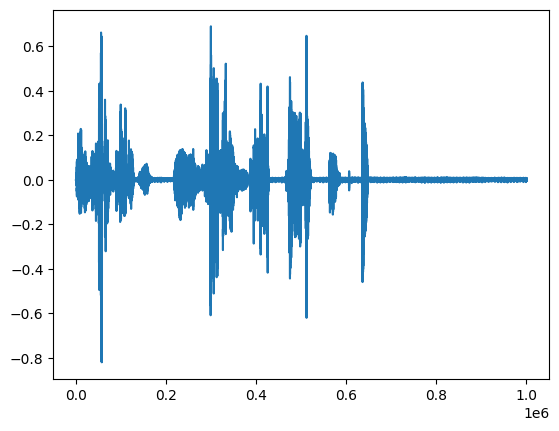

In [26]:
plt.plot(wavs)

In [50]:
import tqdm
c = 8000
N = wavs.shape[0]
count_chank = N//c
i = 1 if (N/c - count_chank)>0 else 0
k = 0
for _ in tqdm.tqdm(range(count_chank+1)):
  k += 1
k

100%|██████████| 126/126 [00:00<?, ?it/s]


126

In [38]:
#path = sys.argv[1]
import json
path = 'out_audio_1.wav'
wf = wave.open(path, "rb")
if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
    print("Audio file must be WAV format mono PCM.")
    #sys.exit(1)

# You can also specify the possible word or phrase list as JSON list,
# the order doesn't have to be strict
rec = KaldiRecognizer(model, wf.getframerate())

while True:
    data = wf.readframes(8000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        r = rec.Result()
        rj = json.loads(r)
        if 'text' in rj and rj['text'] != '':
            print(rj['text'])
        #print(r['partial'])
        #rec.SetGrammar('["one zero one two three oh", "four five six", "seven eight nine zero", "[unk]"]')
    # else:
    #     r = rec.PartialResult()
    #     rj = json.loads(r)
        
    #     if 'partial' in rj:
    #         text = rj['partial']
    #         if len(text)>0:
    #             print(text)

r = rec.FinalResult()
rj = json.loads(r)
if 'text' in rj and rj['text'] != '':
    print(rj['text'])

команды оптимизатора николая
лучше конечно подождать
сейчас же
беру


In [61]:
tqdm?

Init signature: tqdm(*_, **__)
Docstring:     
Decorate an iterable object, returning an iterator which acts exactly
like the original iterable, but prints a dynamically updating
progressbar every time a value is requested.

Parameters
----------
iterable  : iterable, optional
    Iterable to decorate with a progressbar.
    Leave blank to manually manage the updates.
desc  : str, optional
    Prefix for the progressbar.
total  : int or float, optional
    The number of expected iterations. If unspecified,
    len(iterable) is used if possible. If float("inf") or as a last
    resort, only basic progress statistics are displayed
    (no ETA, no progressbar).
    If `gui` is True and this parameter needs subsequent updating,
    specify an initial arbitrary large positive number,
    e.g. 9e9.
leave  : bool, optional
    If [default: True], keeps all traces of the progressbar
    upon termination of iteration.
    If `None`, will leave only if `position` is `0`.
file  : `io.TextIOWrappe

In [62]:
import os
from tqdm import tqdm
base_path = r'c:\Users\aakorobov\Videos'
for file_name in tqdm(os.listdir(base_path),colour='green'):
  if not '.mkv' in file_name:
    continue
  full_path = os.path.join(base_path, file_name)
  #print(full_path)

100%|██████████| 81/81 [00:00<?, ?it/s]


In [52]:
import tqdm
import json
import wave
import sys

from vosk import Model, KaldiRecognizer

model = Model(model_path='data/vosk-model-ru-0.10')

def recognize_file(path):
  #path = 'out_audio_1.wav'
  wf = wave.open(path, "rb")
  if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
      raise Exception("Audio file must be WAV format mono PCM.")
      #sys.exit(1)

  c = 8000
  N = wf.getnframes()
  count_chank = N//c
  i = 1 if (N/c - count_chank)>0 else 0
  k = 0

  result_text = []

  # You can also specify the possible word or phrase list as JSON list,
  # the order doesn't have to be strict
  rec = KaldiRecognizer(model, wf.getframerate())

  for _ in tqdm.tqdm(range(count_chank + i)):
      data = wf.readframes(c)
      if len(data) == 0:
          break
      if rec.AcceptWaveform(data):
          r = rec.Result()
          rj = json.loads(r)
          if 'text' in rj and rj['text'] != '':
              result_text.append(rj['text'])

  r = rec.FinalResult()
  rj = json.loads(r)
  if 'text' in rj and rj['text'] != '':
      result_text.append(rj['text'])

return result_text

100%|██████████| 126/126 [00:06<00:00, 19.33it/s]


['команды оптимизатора николая',
 'лучше конечно подождать',
 'сейчас же',
 'беру']

In [46]:
import wave
import json
import vosk
from vosk import KaldiRecognizer


def recognize_phrase(model: vosk.Model, phrase_wav_path: str) -> str:
    """
    Recognize Russian voice in wav
    """

    wave_audio_file = wave.open(phrase_wav_path, "rb")
    offline_recognizer = KaldiRecognizer(model, wave_audio_file.getframerate())
    data = wave_audio_file.readframes(wave_audio_file.getnframes())

    offline_recognizer.AcceptWaveform(data)
    recognized_data = json.loads(offline_recognizer.Result())["text"]
    return recognized_data

recognize_phrase(model, path)
#'команды оптимизатора николай лучше конечно началу сказать сейчас же беру'
#'команды оптимизатора николай лучше конечно началу подождать сейчас же беру'

Команды оптимизаторы, Николая и Дин. Лучше, конечно, ничего. Подождать. Сейчас еще раз уберу.



'команды оптимизатора николай лучше конечно началу подождать сейчас же беру'

In [3]:
python -V
pip -V
where python
where pip

Python 3.10.5
pip 24.1.2 from C:\work\audio_to_text\.venv\lib\site-packages\pip (python 3.10)

c:\work\audio_to_text\.venv\Scripts\python.exe
C:\Users\aakorobov\.pyenv\pyenv-win\shims\python
C:\Users\aakorobov\.pyenv\pyenv-win\shims\python.bat
C:\Users\aakorobov\AppData\Local\Microsoft\WindowsApps\python.exe


INFO: Could not find "-V".


c:\work\audio_to_text\.venv\Scripts\pip.exe
C:\Users\aakorobov\.pyenv\pyenv-win\shims\pip
C:\Users\aakorobov\.pyenv\pyenv-win\shims\pip.bat


INFO: Could not find "-V".


In [5]:
import pyaudio

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=8000)

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=8000)

In [2]:
from vosk import Model, KaldiRecognizer
import os
import json

# if not os.path.exists("model-en"):
#     print ("Please download the model from https://github.com/alphacep/kaldi-android-demo/releases and unpack as 'model' in the current folder.")
#     exit (1)

import pyaudio

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=8000)
stream.start_stream()

#model = Model("model-en")

#model = Model(model_path='data/vosk-model-ru-0.10')
rec = KaldiRecognizer(model, 16000)
print('start listing...')
while True:
    data = stream.read(2000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        print(rec.Result())
    else:
        #print(rec.PartialResult())
        r = rec.PartialResult()
        rj = json.loads(r)
        
        if 'partial' in rj:
            text = rj['partial']
            if len(text)>0:
                print(text)

print(rec.FinalResult())

start listing...
алло
алло
алло
алло
алло
{
  "text" : "алло"
}
привет
привет
привет всем
привет всем как
привет всем как
привет всем как
привет всем как
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
привет всем как дела
{
  "text" : "привет всем как дела"
}
да
да
да блин
да блин
да блин почему
да блин почему
да блин почему
да блин почему
да блин почему она
да блин почему она
да блин почему она так
да блин почему она так
да блин почему она так все просто
да блин почему она так все просто
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
да блин почему она так все происходит
{
  "text" : "да блин почему она так все происходит"
}
но пр

OSError: [Errno -9981] Input overflowed